In [1]:
# Only needed in a Jupyter Notebook
%matplotlib inline
# Optional plot styling
import matplotlib
matplotlib.style.use('fivethirtyeight')

In [3]:
import matplotlib.pyplot as plt
from pycalphad import Database, binplot, calculate, Model, equilibrium
import pycalphad.variables as v
import numpy as np

In [21]:
db = Database('N.TDB')

my_phases = ['Q']

result = calculate(db, ['MG', 'AL', 'SI', 'CU'], 'Q', T=(300, 900, 0.5), output='heat_capacity')

eq = equilibrium(db, ['MG', 'AL', 'SI', 'CU'], my_phases, {v.X('SI'): 7/21,v.X('MG'): 9/21,v.X('CU'): 2/21,
                                                           v.T: (300,900,25), v.P: 101325}, output='heat_capacity')

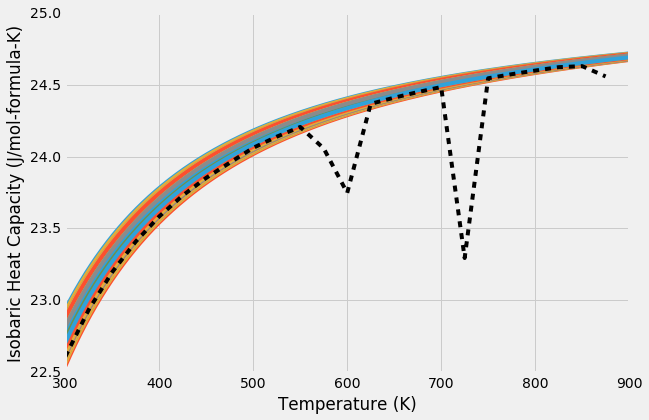

In [22]:
fig = plt.figure(figsize=(9,6))
fig.gca().set_xlabel('Temperature (K)')
fig.gca().set_ylabel('Isobaric Heat Capacity (J/mol-formula-K)')
fig.gca().plot(result['T'], result['heat_capacity'])
fig.gca().plot(eq['T'], np.squeeze(eq['heat_capacity'].values),'--k')
plt.show()

In [17]:
print(eq)

<xarray.Dataset>
Dimensions:       (P: 1, T: 1, X_CU: 1, X_MG: 1, X_SI: 1, component: 4, internal_dof: 10, vertex: 4)
Coordinates:
  * P             (P) float64 1.013e+05
  * T             (T) float64 800.0
  * X_CU          (X_CU) float64 1e-09
  * X_MG          (X_MG) float64 1e-09
  * X_SI          (X_SI) float64 1e-09
  * vertex        (vertex) int64 0 1 2 3
  * component     (component) object 'AL' 'CU' 'MG' 'SI'
  * internal_dof  (internal_dof) int64 0 1 2 3 4 5 6 7 8 9
Data variables:
    NP            (P, T, X_CU, X_MG, X_SI, vertex) float64 0.1158 0.8842 nan nan
    MU            (P, T, X_CU, X_MG, X_SI, component) float64 -1.256e+15 ...
    GM            (P, T, X_CU, X_MG, X_SI) float64 -3.251e+04
    X             (P, T, X_CU, X_MG, X_SI, vertex, component) float64 0.1429 ...
    Y             (P, T, X_CU, X_MG, X_SI, vertex, internal_dof) float64 1.0 ...
    Phase         (P, T, X_CU, X_MG, X_SI, vertex) object u'Q' u'Q' '' ''
Attributes:
    solve_iterations: 1
    engine:

Not sure why X_CU, Mg, Si=1e-09?

Also above figure sounds like that the equilibrium heat capacity only follows one of the end member and there is no configuration entropy in it, I expect that the equilibrium one goes to higher value than all of the end-members due to configuration term $$ RT\sum_{s}a^{(s)} \sum_{i} y_{i}^{(s)} \ln y_{i}^{(s)} $$ 
in CEF
$$ G = \sum_{I0}P_{I0}(Y).G^\circ_{I0}  + RT\sum_{s}a^{(s)} \sum_{i} y_{i}^{(s)} \ln y_{i}^{(s)} + \sum_{Z>0} \sum_{IZ} P_{IZ}(Y).L_{IZ} $$

Is it possible to print out the coefficient P, A, y in the equilibrium?

If I can plot the energy (G) of equilibrium for whole range of composition versus all end-members, this will also show me how much is configuration entropy contribution:

ValueError: x and y must be the same size

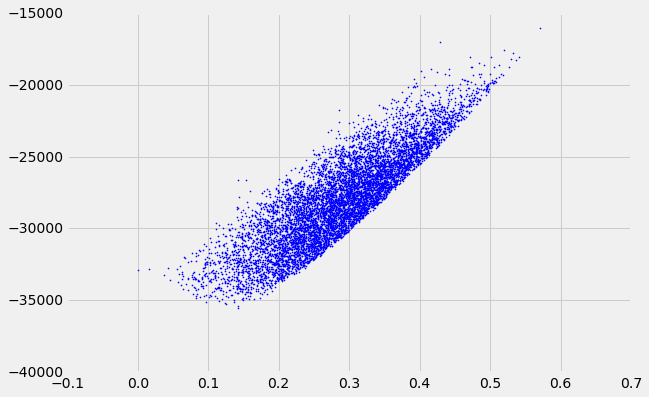

In [27]:
from pycalphad.plot.utils import phase_legend
legend_handles, colorlist = phase_legend(my_phases)

fig = plt.figure(figsize=(9,6))
ax = fig.gca()

result = calculate(db, ['MG', 'AL', 'SI', 'CU'], 'Q', T=800, output='GM')
ax.scatter(result.X.sel(component='AL'), result.GM,
               marker='.', s=5, color=colorlist['Q'])

eq = equilibrium(db, ['MG', 'AL', 'SI', 'CU'], my_phases, {v.X('SI'): 7/21,v.X('MG'): 9/21,v.X('CU'): 2/21, 
                                                           v.T: 800, v.P: 101325},output='GM')
ax.scatter(result.X.sel(component='AL'), eq.GM,
               marker='+', s=5, color=colorlist['Q'])

